In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
import os,cv2
from PIL import Image
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,BatchNormalization,Dropout,Dense,MaxPooling2D,Activation,Flatten

In [2]:
one_hot=OneHotEncoder()
one_hot.fit([[0],[1]])
data=[]
paths=[]
results=[]
for r,d,f in os.walk('../input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if img.shape==(128,128,3):
        data.append(np.array(img))
        results.append(one_hot.transform([[0]]).toarray())
paths=[]
for r,d,f in os.walk('../input/brain-mri-images-for-brain-tumor-detection/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if img.shape==(128,128,3):
        data.append(np.array(img))
        results.append(one_hot.transform([[1]]).toarray())
data=np.array(data)
print('data--',data.shape)

results=np.array(results)
results=results.reshape(139,2)

data-- (139, 128, 128, 3)


In [3]:
train_x,valid_x,train_y,valid_y=train_test_split(data,results,test_size=0.25,random_state=42)


num_classes=2

model = keras.Sequential()
model.add(Conv2D(32,(5,5),strides=(2,2),padding='same',input_shape=(128,128,3))) #input shape= (128,128,3)
model.add(Conv2D(48,(5,5),strides=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))

model.add(Conv2D(96,(3,3),strides=(2,2),padding='same'))
model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 48)        38448     
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 48)        192       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 48)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 96)          41568     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1

2022-04-16 09:12:54.198993: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


2022-04-16 09:12:54.513907: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


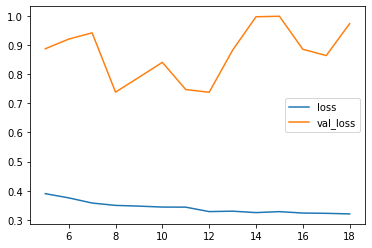

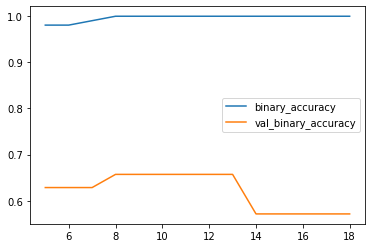

Best Validation Loss: 0.7374
Best Validation Accuracy: 0.8000


In [4]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    train_x, train_y,
    validation_data=(valid_x, valid_y),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

history_df = pd.DataFrame(history.history)
# Start to plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()
plt.show()

print(("Best Validation Loss: {:0.4f}" + "\nBest Validation Accuracy: {:0.4f}")\
        .format(history_df['val_loss'].min(),history_df['val_binary_accuracy'].max()))

